In [1]:
import os
import re
import random
from PIL import Image
import matplotlib.pyplot as plt

#################
#### Image 4 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_4.png


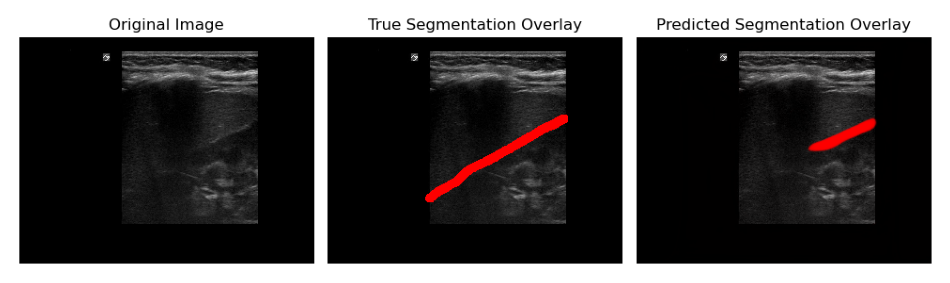


#################
#### Image 2 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_2.png


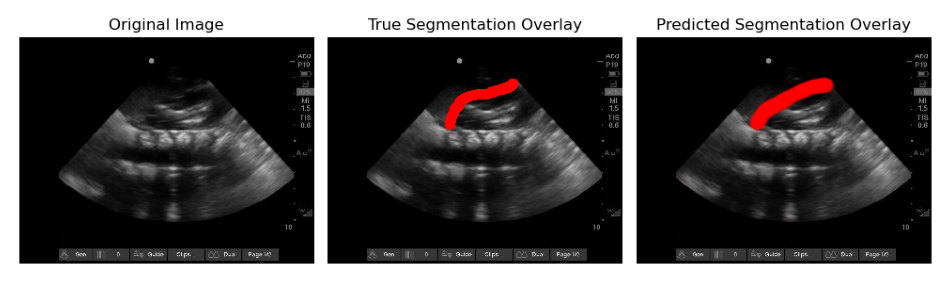


#################
#### Image 5 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_5.png


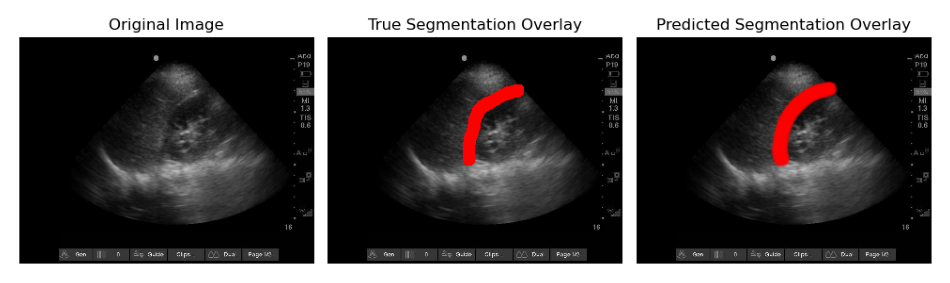


#################
#### Image 3 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_3.png


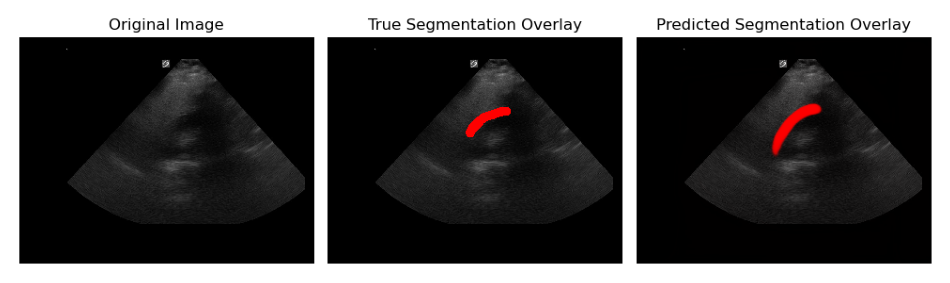


#################
#### Image 9 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_9.png


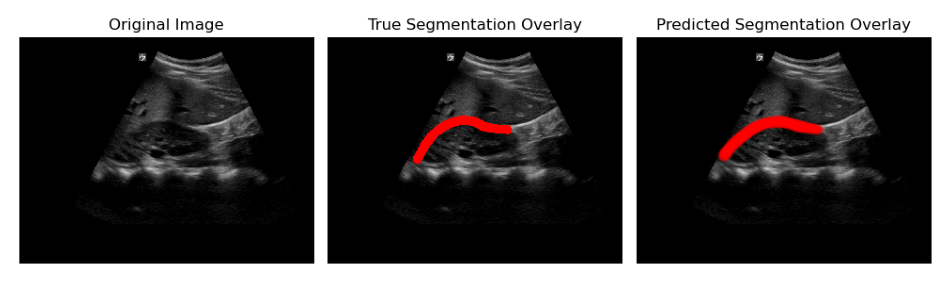


#################
#### Image 7 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_7.png


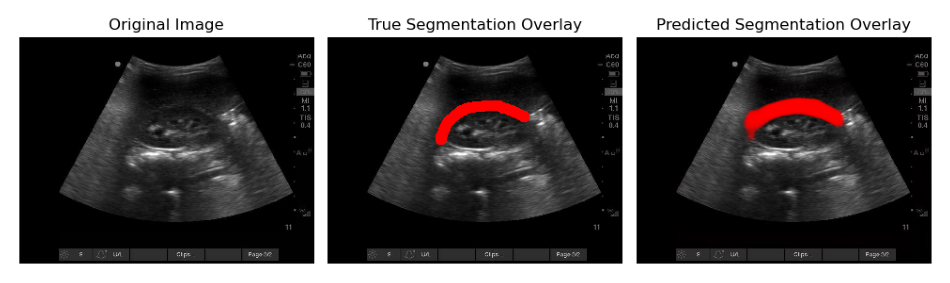


#################
#### Image 0 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_0.png


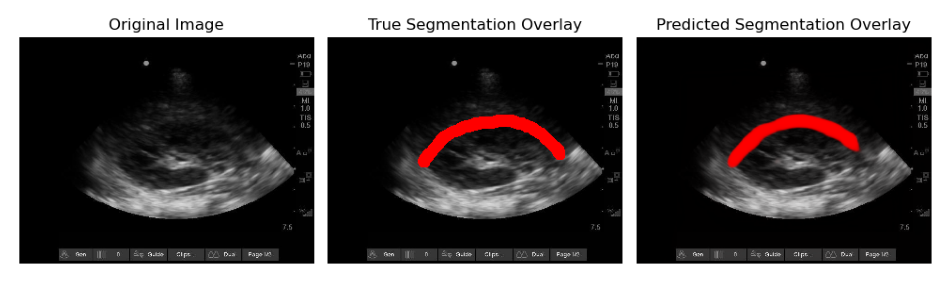


#################
#### Image 1 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_1.png


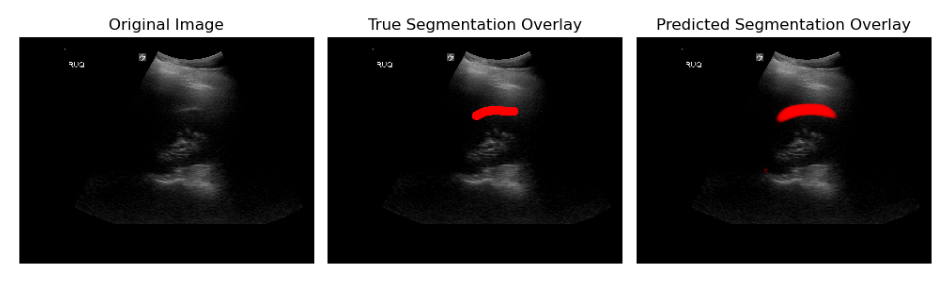


#################
#### Image 6 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_6.png


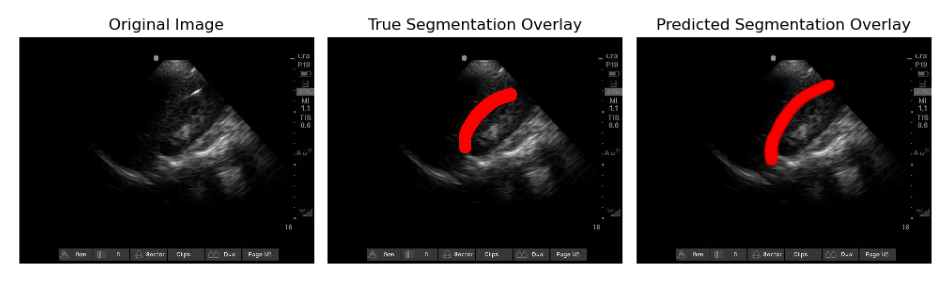


#################
#### Image 8 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_8.png


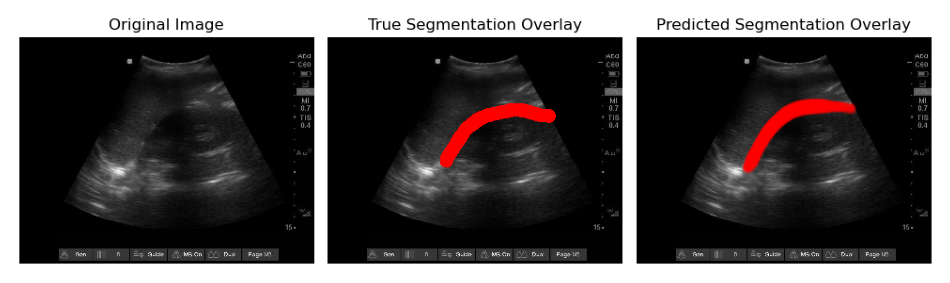

In [6]:
proj_dir = '03_14_2024_ucsf_fast_test'
run_dir = 'chocolate-bun-5'
logging_dir = '/scratch/users/austin.zane/ucsf_fast/logging/'
image_dir = os.path.join(logging_dir, proj_dir, run_dir, 'segmentation_overlays')

file_names = os.listdir(image_dir)
image_groups = {}

for file_name in file_names:
    match = re.match(r'epoch_(\d+)_batch_(\d+)_image_(\d+)\.(\w+)', file_name)
    if match:
        epoch, batch, image_num, extension = match.groups()
        if extension == 'png':  # Only consider files with .png extension
            if image_num not in image_groups:
                image_groups[image_num] = []
            image_groups[image_num].append((int(epoch), int(batch), file_name))

if len(image_groups) == 0:
    print('No images found')

# Print file names in order by epoch and then by batch for each image
for image_num, files in image_groups.items():
    print(f"#################\n#### Image {image_num} ####\n#################")
    files.sort()  # Sort files by epoch and then by batch
    
    for epoch, batch, file_name in files:
        if epoch != 24:
            continue
        print(f'Epoch: {epoch}')
        print(f'File name: {file_name}')
        img = Image.open(os.path.join(image_dir, file_name))
        
        # Set the figure size (adjust width and height as needed)
        fig, ax = plt.subplots(figsize=(12, 4))
        
        ax.imshow(img)
        ax.axis('off')
        plt.show()
    
    print()

## Randomly select images to visualize for the proposal

In [43]:
raw_image_dir = '/scratch/users/austin.zane/ucsf_fast/data/pilot_labeling/AnnotationData/MorisonPouchMasks_1-23'

raw_image_names = [f for f in os.listdir(raw_image_dir) if not '_Morison' in f and f.endswith('.png')]


In [48]:
raw_image_choice = random.sample(raw_image_names, 2)

In [49]:
raw_image_choice

['A_EM61ro_0.png', 'A_gkvD8D_149.png']

# Verify that annotation and image processing was successful

Verfying correctness of `/accounts/campus/austin.zane/ucsf_fast/notebooks/accessing_mdai_data.py`

If masks and images match, we are good to go.

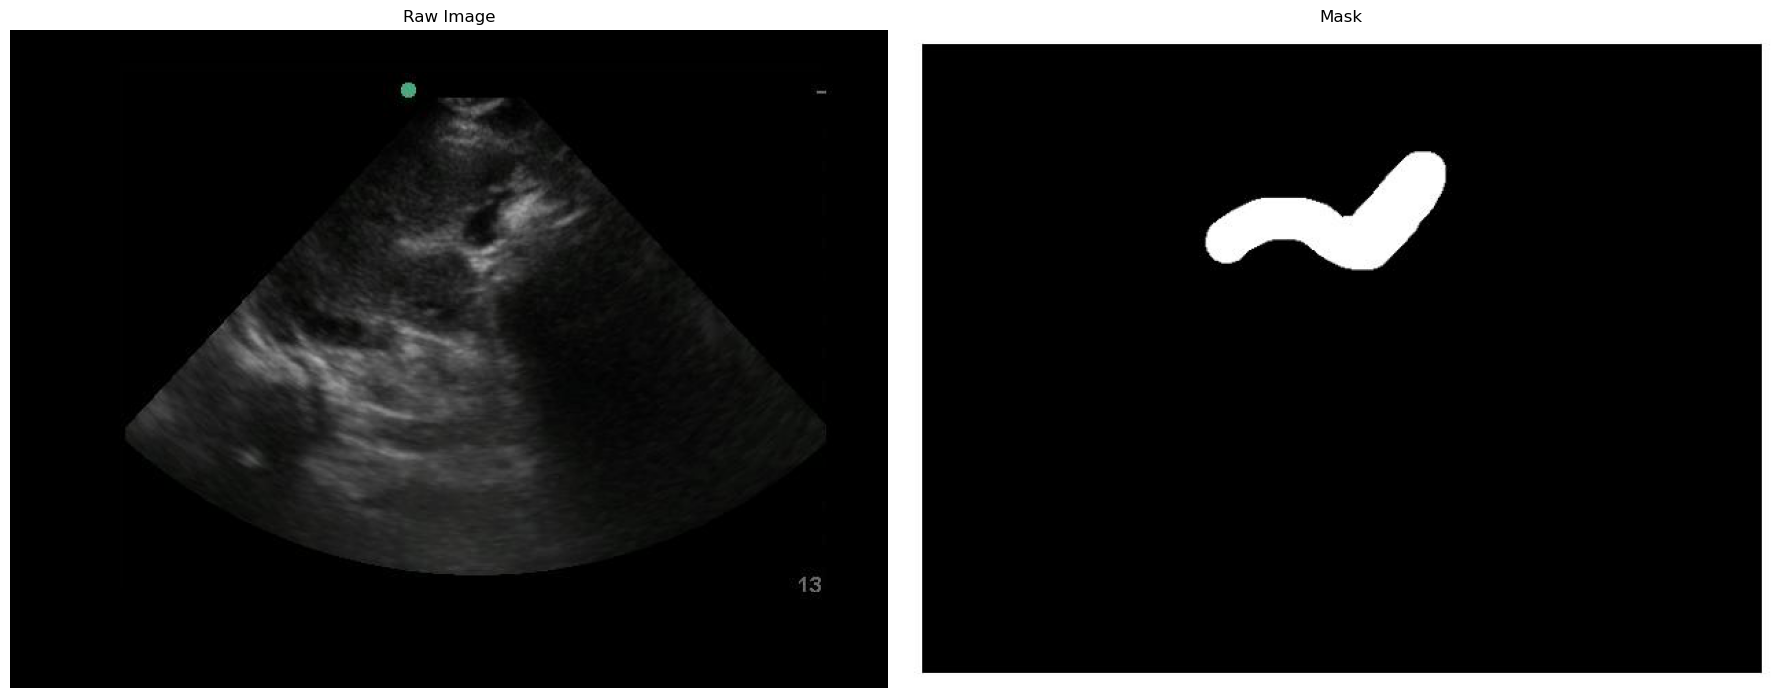

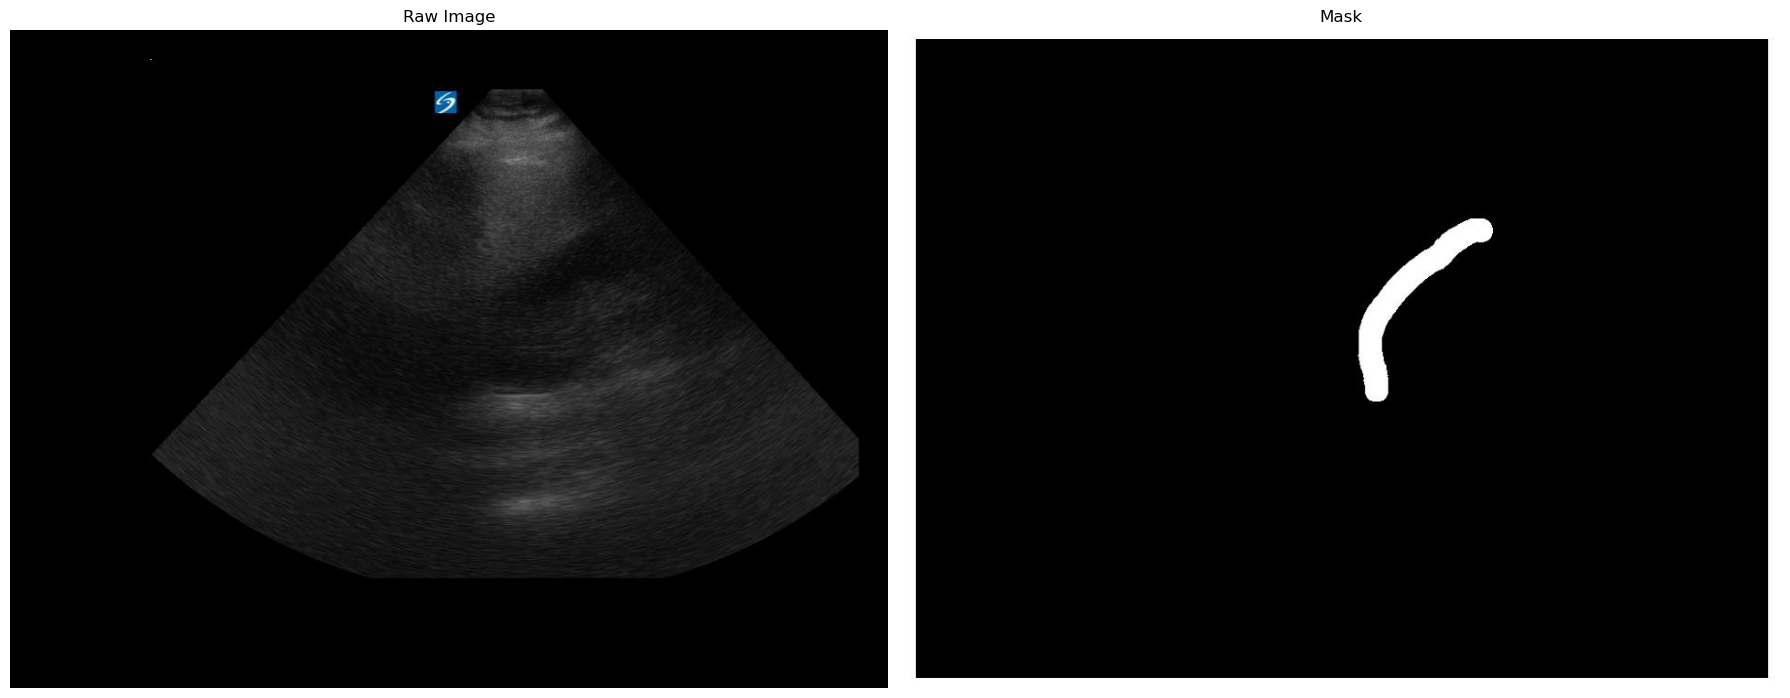

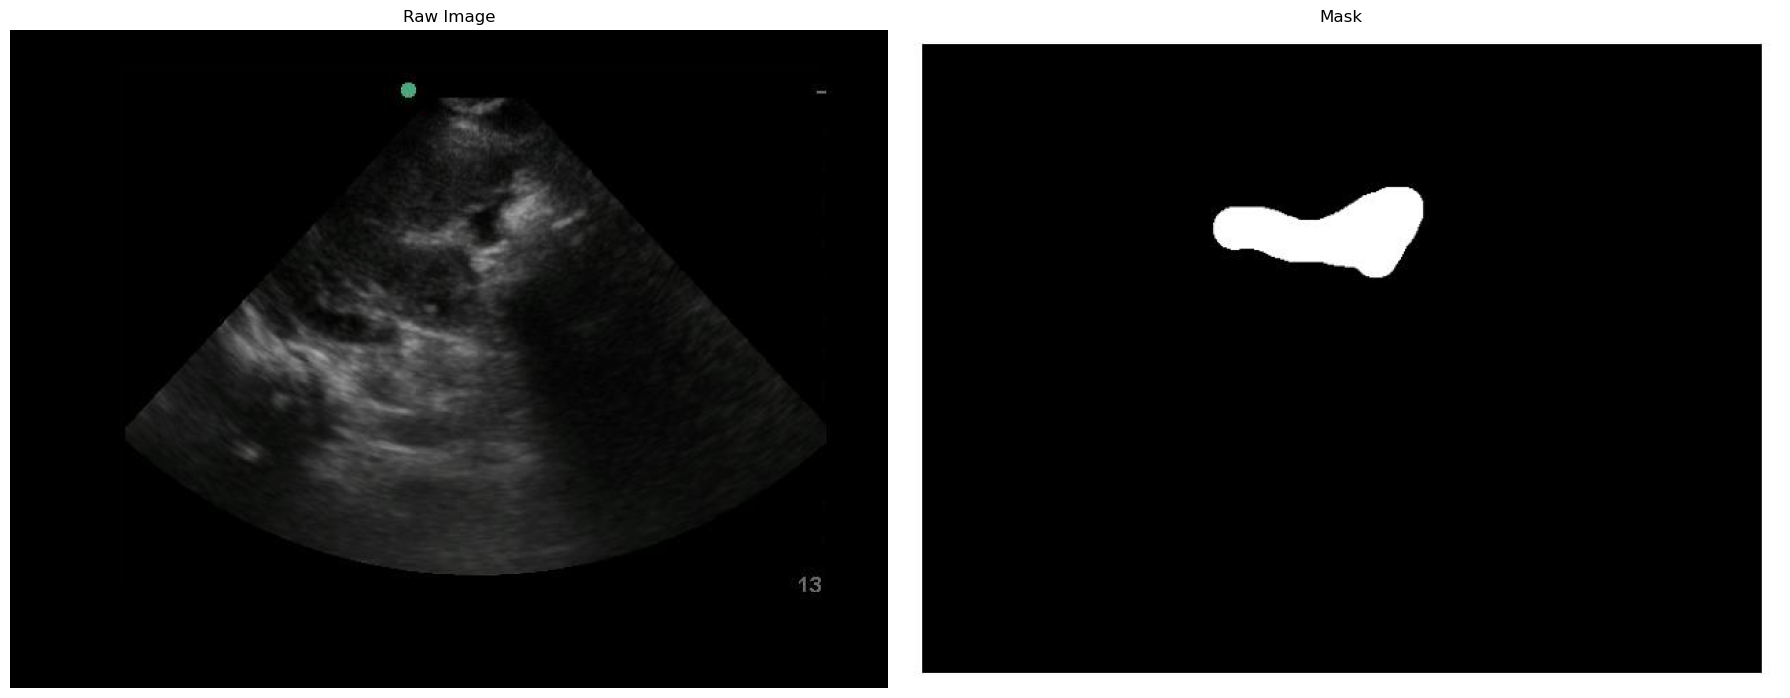

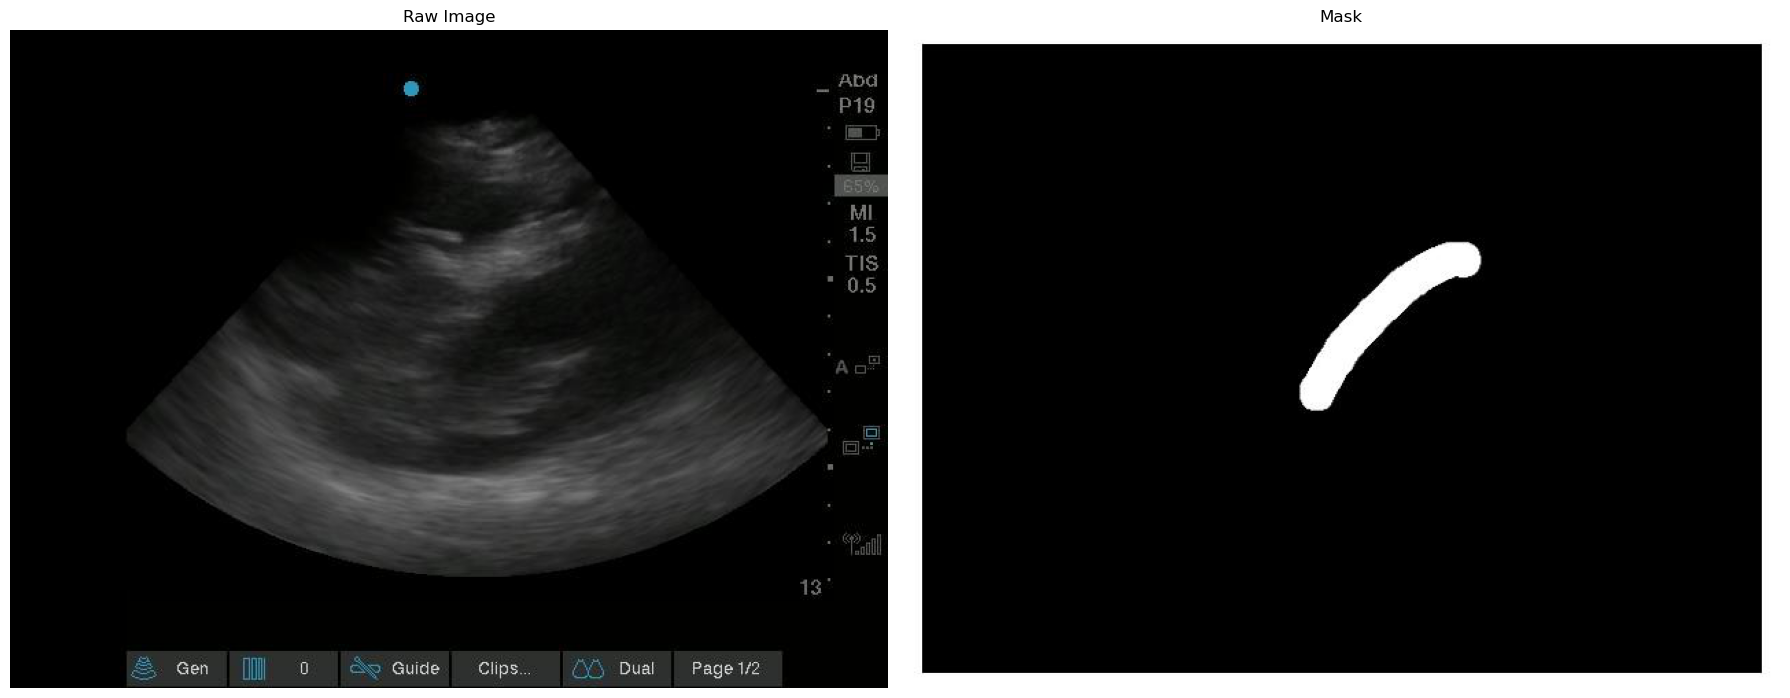

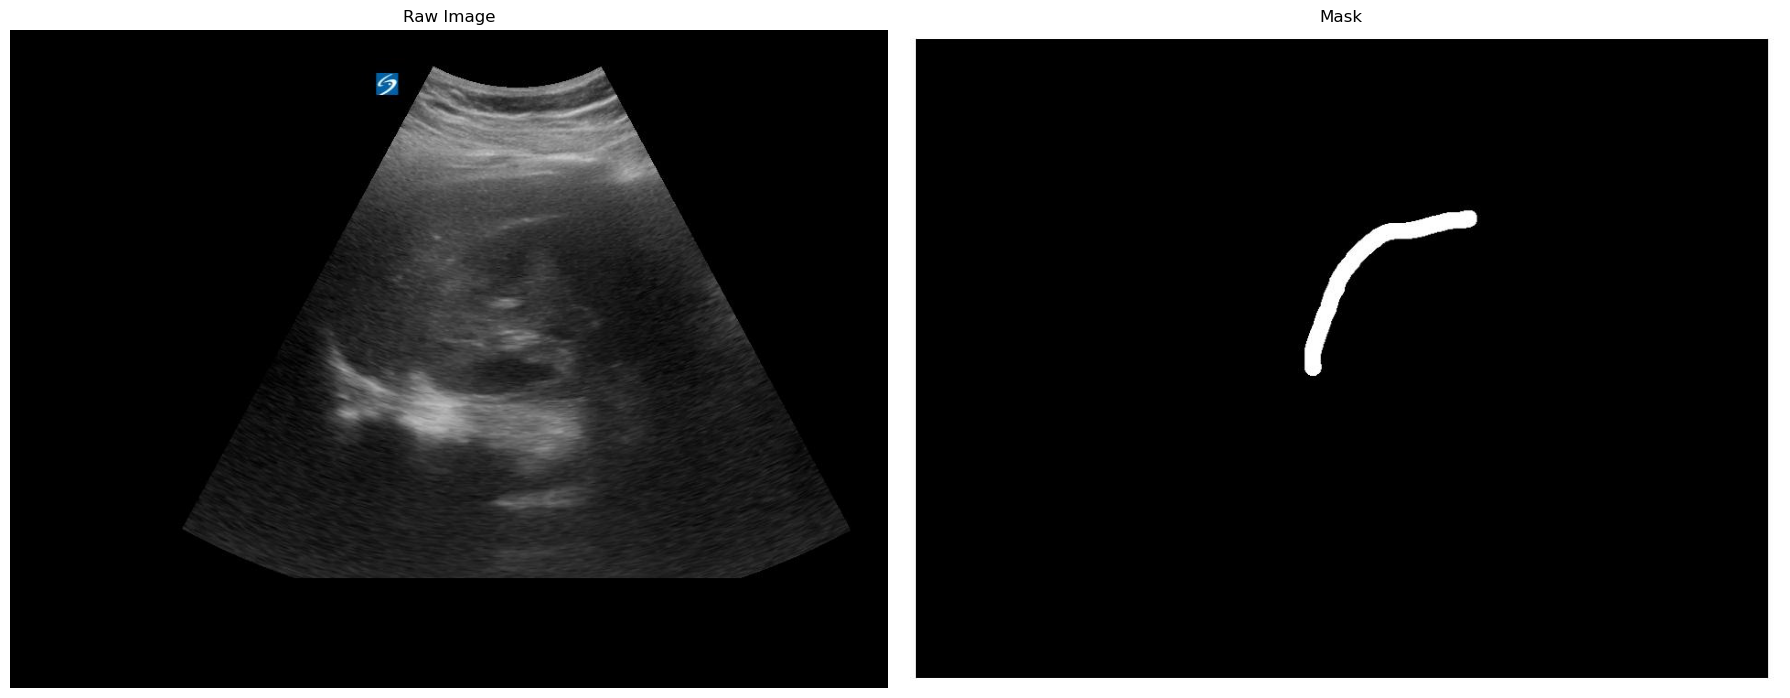

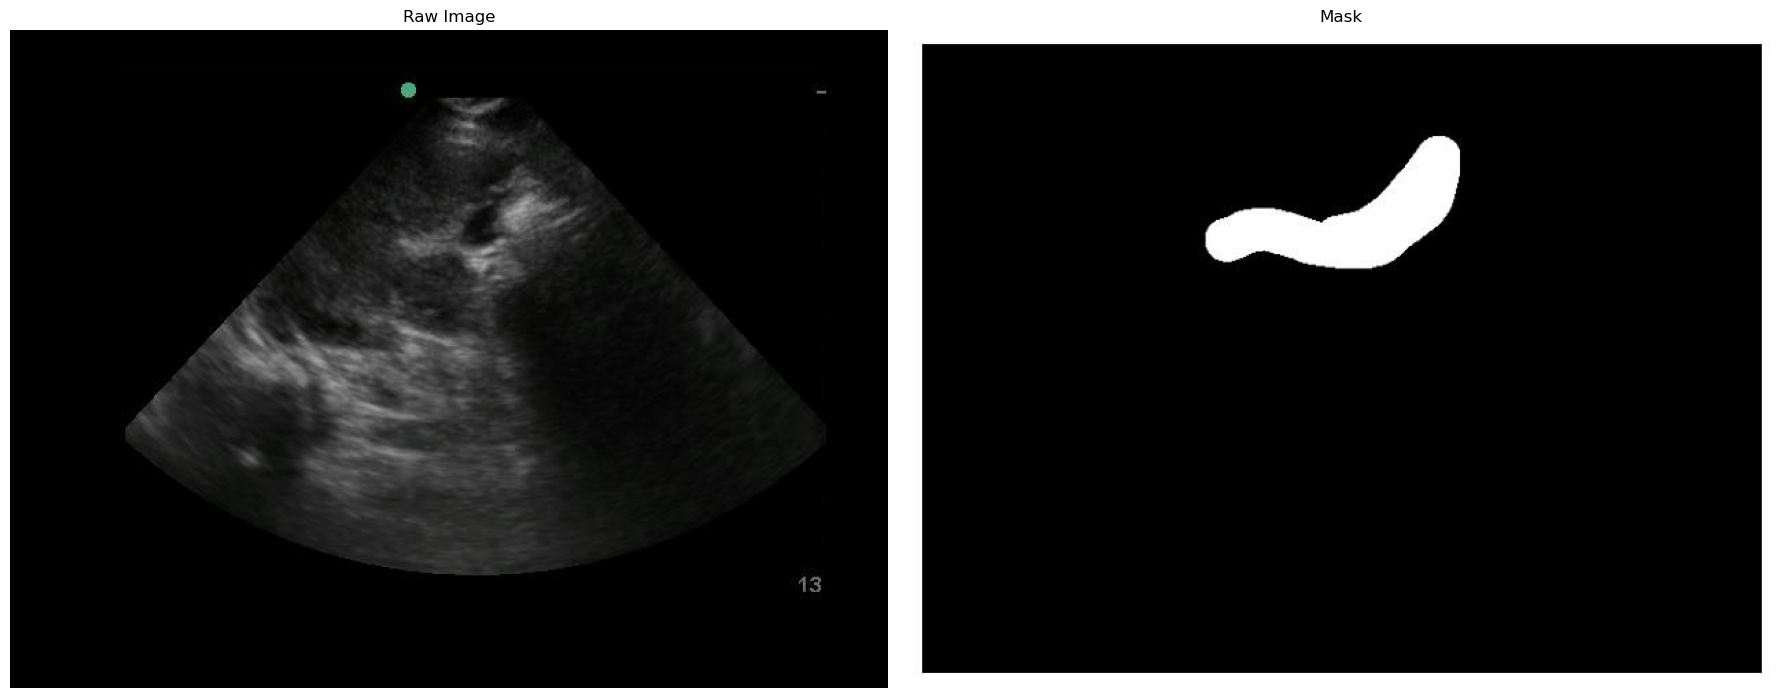

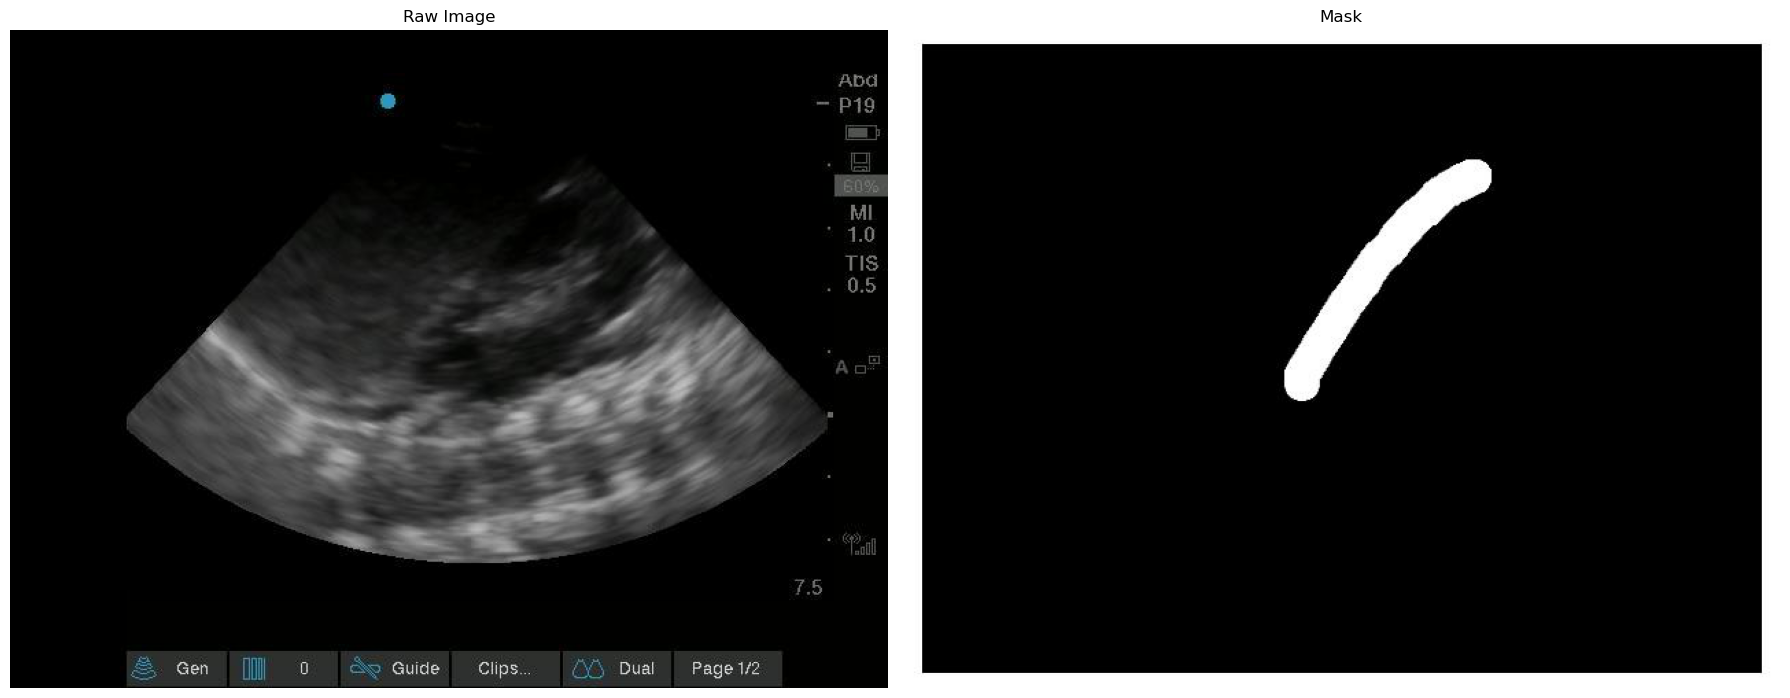

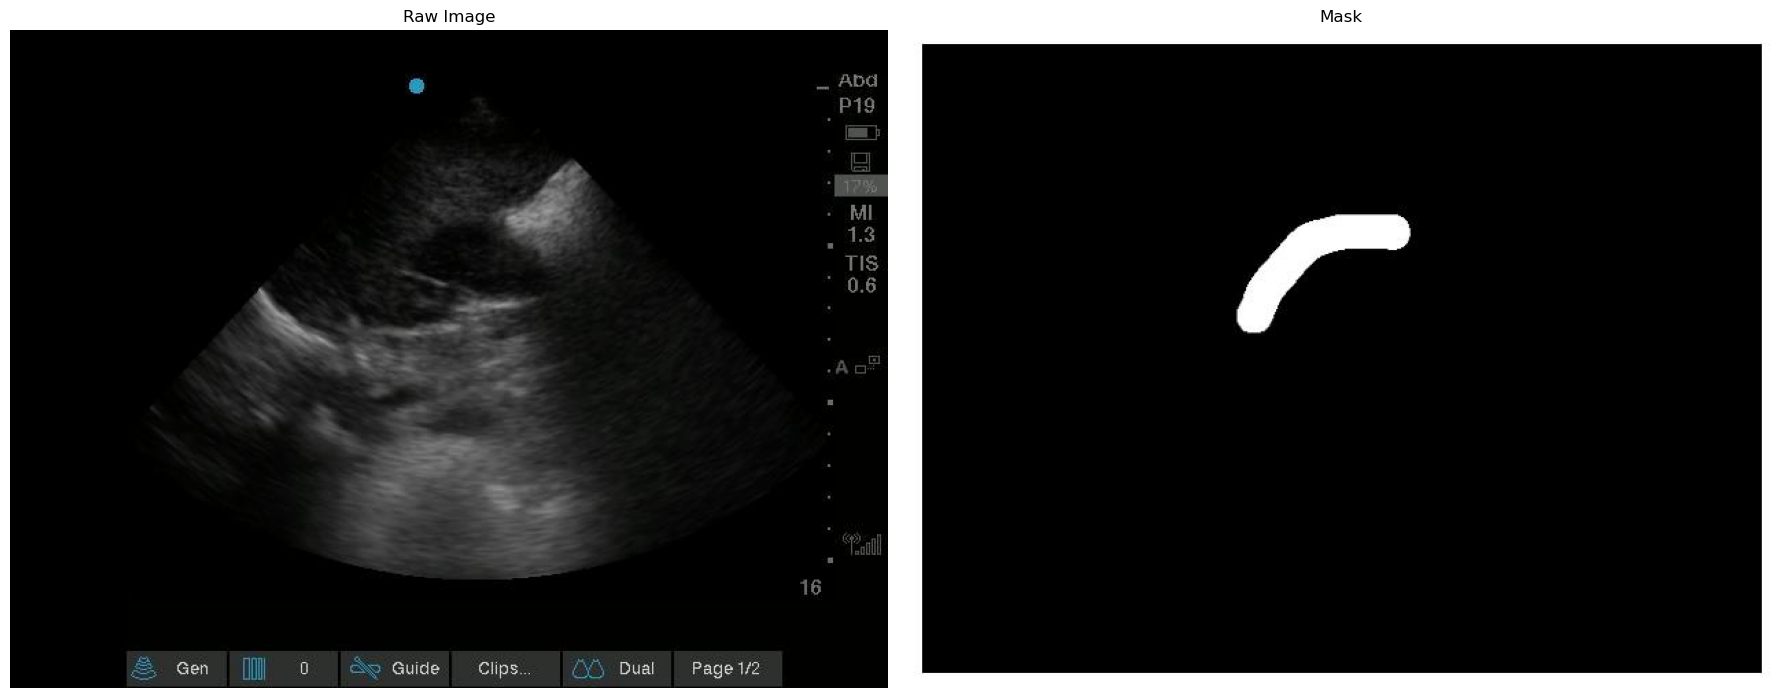

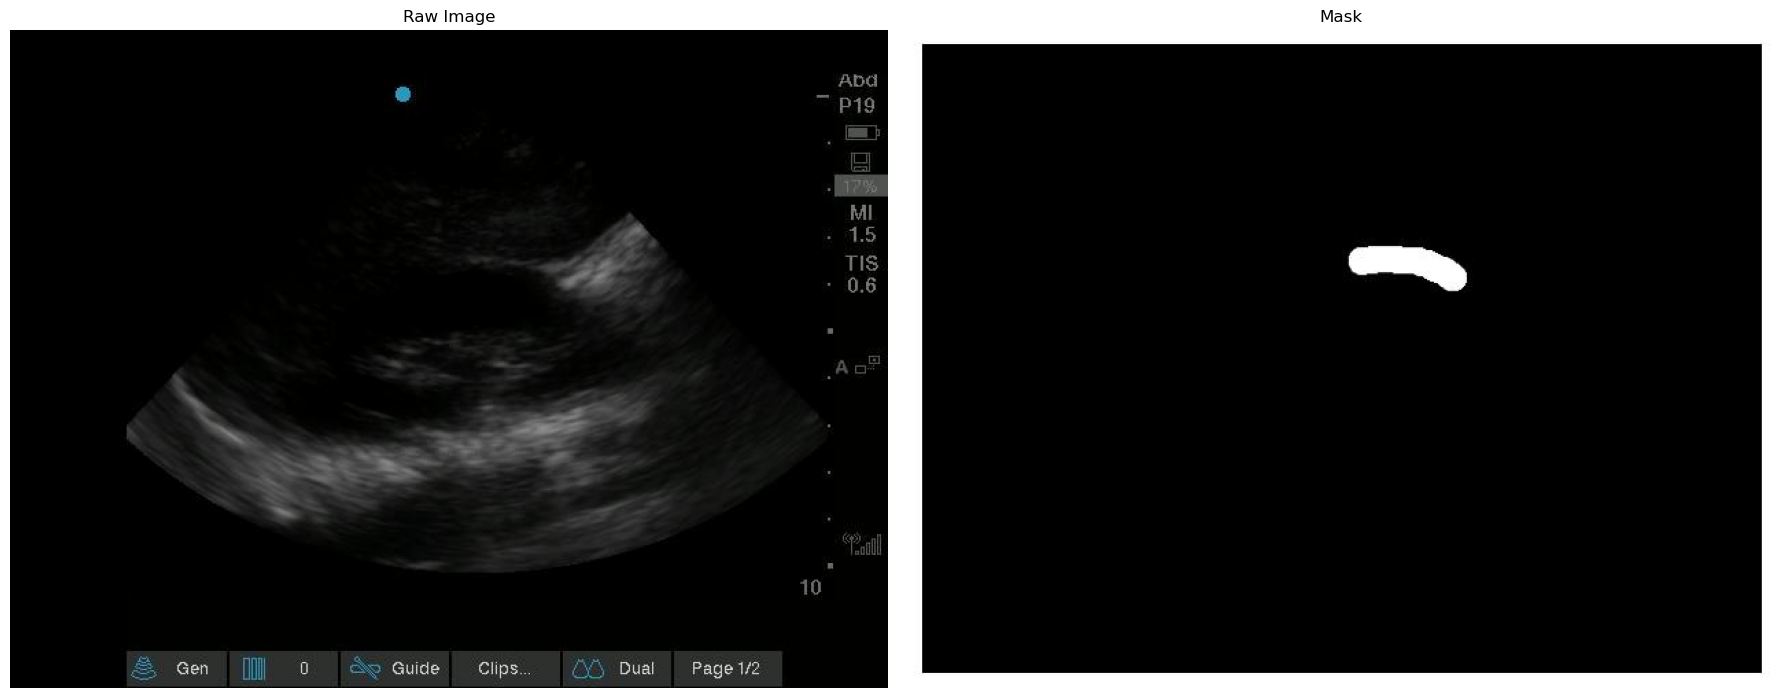

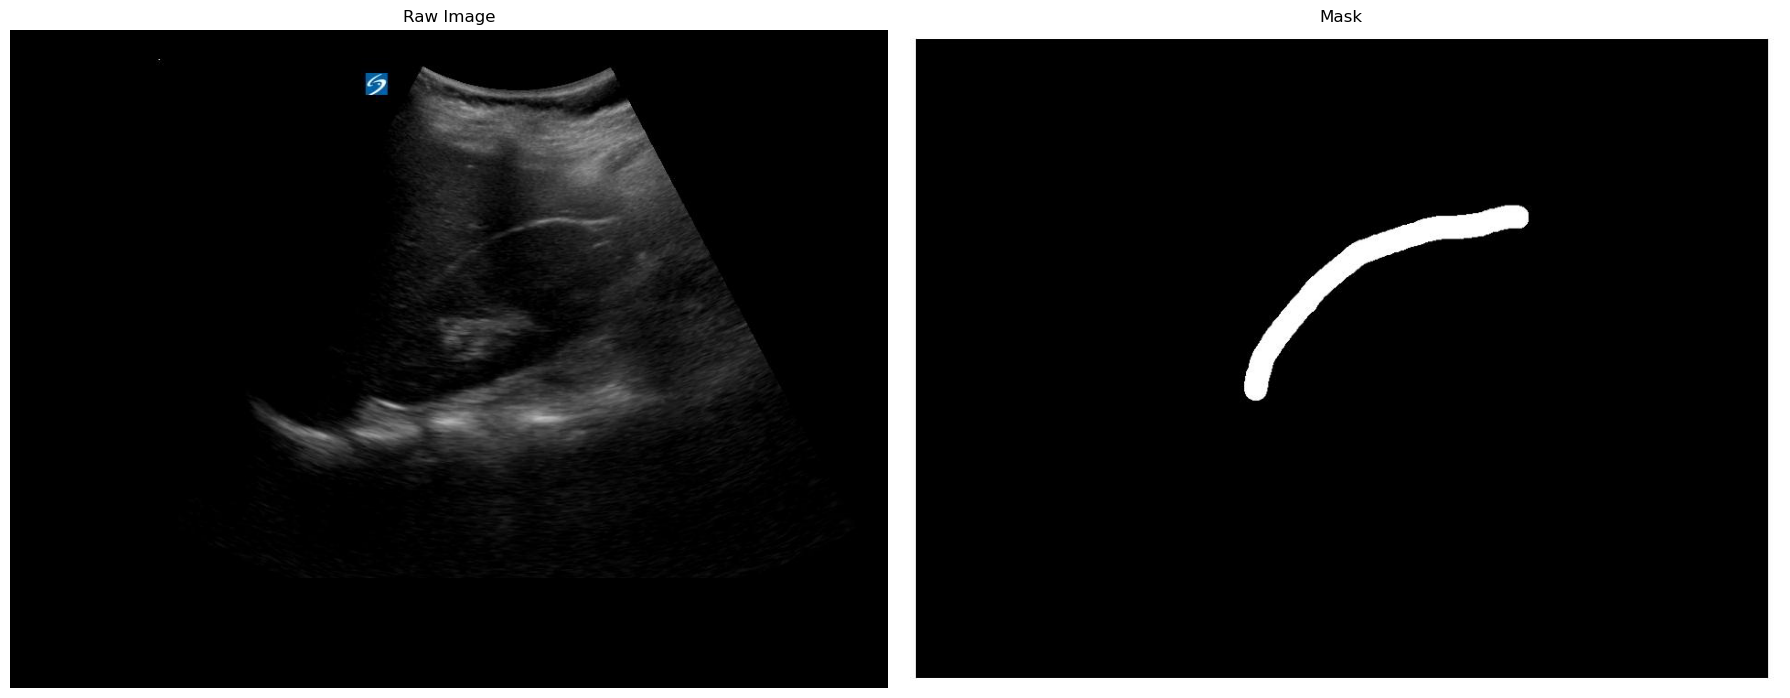

In [8]:
raw_image_dir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/raw_images'
mask_dir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/masks'

mask_file_names = os.listdir(mask_dir)
mask_file_names_sampled = random.sample(mask_file_names, 10)

raw_image_file_names = [x.split('_Mask')[0] + '.jpg' for x in mask_file_names_sampled]

for mask_fname in mask_file_names_sampled:
    raw_img_fname = mask_fname.split('_Mask')[0] + '.jpg'
    
    mask_img = Image.open(os.path.join(mask_dir, mask_fname))
    raw_img = Image.open(os.path.join(raw_image_dir, raw_img_fname))
        
    # Set the figure size (adjust width and height as needed)
    fig, ax = plt.subplots(1, 2, figsize=(18, 9))
    
    # Display the raw image
    ax[0].imshow(raw_img, cmap='gray')
    ax[0].set_title('Raw Image')
    ax[0].axis('off')
    
    # Display the mask image
    ax[1].imshow(mask_img, cmap='gray')
    ax[1].set_title('Mask')
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    

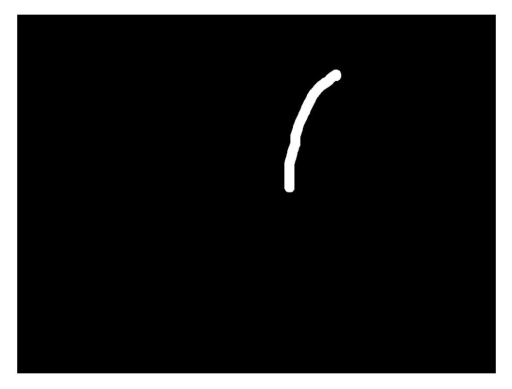

In [3]:
poly_img = Image.open('/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/newton_test_polygon.jpg').convert('L')
plt.imshow(poly_img, cmap='gray')
plt.axis('off')
plt.show()